In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                  centers=blob_centers,
                  cluster_std=0.7,
                  random_state=0
                  )

X[:, 0] *= 1000

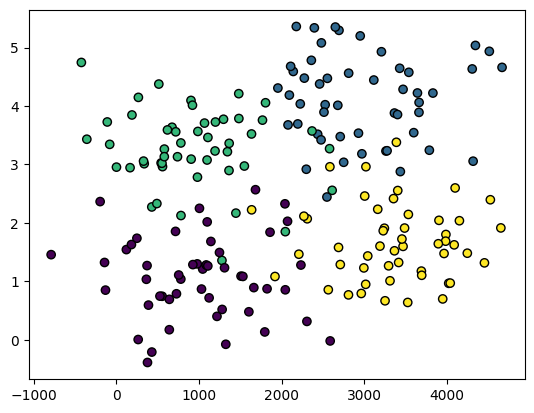

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', linewidths=1)

In [5]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1
                    ).fit(X, y)

c:\Users\Lev\Desktop\ml\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.00087024  0.22028329 -0.70734641 -0.25351149 -0.55454606 -0.50526702]
 [-0.67989163 -0.42282917 -0.31973169  0.18482373 -0.20979013  0.28329271]]

Веса между скрытым и выходным слоем:
[[-0.4563466  -0.31286821  0.55331952  0.63019281]
 [-0.11132454  0.47517164  0.47611374  0.47668908]
 [-0.45156226 -0.54548577 -0.40349775  0.42555045]
 [-0.42639022 -0.1271602   0.81847405 -0.11275086]
 [ 0.49092938 -0.15237148  0.39620681  0.35657778]
 [-0.55881074  0.24018013  0.86516476  0.22719031]]


In [7]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:, j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.00087024 -0.67989163], 
0 1 [ 0.22028329 -0.42282917], 
0 2 [-0.70734641 -0.31973169], 
0 3 [-0.25351149  0.18482373], 
0 4 [-0.55454606 -0.20979013], 
0 5 [-0.50526702  0.28329271], 

1 0 [-0.4563466  -0.11132454 -0.45156226 -0.42639022  0.49092938 -0.55881074], 
1 1 [-0.31286821  0.47517164 -0.54548577 -0.1271602  -0.15237148  0.24018013], 
1 2 [ 0.55331952  0.47611374 -0.40349775  0.81847405  0.39620681  0.86516476], 
1 3 [ 0.63019281  0.47668908  0.42555045 -0.11275086  0.35657778  0.22719031], 



In [8]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.6570262   0.48301429 -0.96506674  0.32841613 -0.20439674 -0.11181046]

Веса смещения для выходного слоя:
[-0.14023899  0.6451773  -0.6909911  -0.25382559]


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y, clf.predict(X))

array([[ 0, 46,  3,  1],
       [ 0, 23,  0, 27],
       [ 0, 46,  4,  0],
       [ 0,  8,  0, 42]], dtype=int64)

In [10]:
accuracy_score(y, clf.predict(X))

0.345

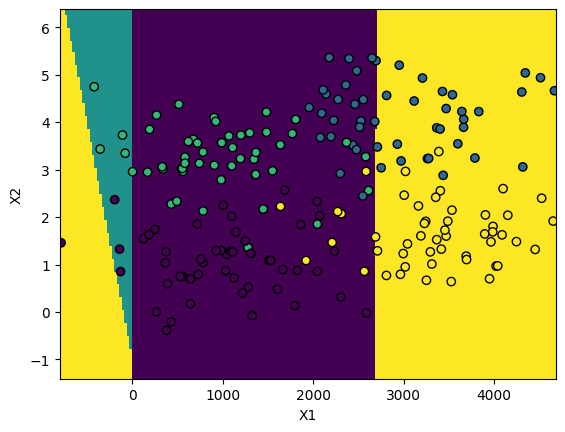

In [11]:
X0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, X.shape[0])
X1 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

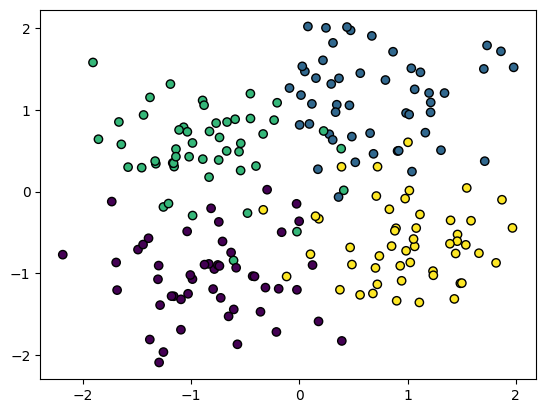

In [12]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)

In [13]:
clf = MLPClassifier(hidden_layer_sizes=(100, 50, 50),
                    random_state=1,
                    max_iter=10000
                    ).fit(X_scaled, y)
accuracy_score(y, clf.predict(X_scaled))

1.0

In [14]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 0,  0, 50,  0],
       [ 0,  0,  0, 50]], dtype=int64)

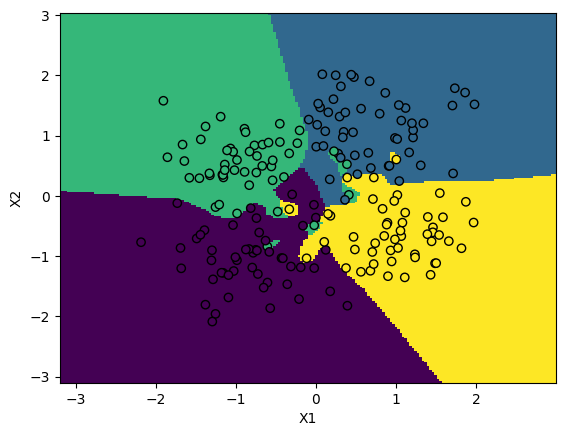

In [15]:
X0 = np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()